<a href="https://colab.research.google.com/github/chavansayali/BigMart-Analysis-and-Prediction-on-Sales-Data/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CrowdFunding-Predicting-Startup-Acquisition**


#Building-Machine-Learning-Pipeline-on-Startups-Acquisition
Our aim to understand the financial conditions of company fundraising goals.


#Objective:
The objective of the project is to predict whether a startup which is currently Operating, IPO, Acquired, or closed.This problem will be solved through a Supervised Machine Learning approach by training a model based on the history of startups which were either acquired or closed.



In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# prompt: code to unzip the drive file

!unzip -uq "/content/drive/MyDrive/Data_companies.zip" -d "/content/drive/MyDrive"


In [142]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [143]:
#loading the data
data = pd.read_csv("/content/drive/MyDrive/companies.csv")

In [144]:
df = data.copy()

In [145]:
df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [146]:
df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')


- **id**: Unique identifier for the entity.
- **Unnamed: 0.1**: It seems like an index or additional identifier, possibly from a DataFrame or dataset.
- **entity_type**: Type of entity (e.g., company, organization).
- **entity_id**: Unique identifier for the entity.
- **parent_id**: Identifier for the parent entity (if applicable).
- **name**: Name of the entity.
- **normalized_name**: Name of the entity in a standardized format.
- **permalink**: URL-friendly version of the entity's name.
- **category_code**: Code representing the category or industry of the entity.
- **status**: Current status of the entity (e.g., active, closed).
- **founded_at**: Date when the entity was founded.
- **closed_at**: Date when the entity was closed (if applicable).
- **domain**: Domain name associated with the entity.
- **homepage_url**: URL of the entity's homepage.
- **twitter_username**: Twitter username of the entity.
- **logo_url**: URL of the entity's logo image.
- **logo_width**: Width of the entity's logo image.
- **logo_height**: Height of the entity's logo image.
- **short_description**: Brief description of the entity.
- **description**: Detailed description of the entity.
- **overview**: Overview or summary of the entity.
- **tag_list**: List of tags or keywords associated with the entity.
- **country_code**: Code representing the country where the entity is located.
- **state_code**: Code representing the state or province where the entity is located.
- **city**: City where the entity is located.
- **region**: Region where the entity is located.
- **first_investment_at**: Date of the first investment made by the entity.
- **last_investment_at**: Date of the most recent investment made by the entity.
- **investment_rounds**: Number of investment rounds the entity has participated in.
- **invested_companies**: Number of companies the entity has invested in.
- **first_funding_at**: Date of the first funding round received by the entity.
- **last_funding_at**: Date of the most recent funding round received by the entity.
- **funding_rounds**: Number of funding rounds the entity has undergone.
- **funding_total_usd**: Total amount of funding received by the entity in USD.
- **first_milestone_at**: Date of the first milestone reached by the entity.
- **last_milestone_at**: Date of the most recent milestone reached by the entity.
- **milestones**: Significant achievements or events reached by the entity.
- **relationships**: Relationships the entity has with other entities (e.g., partnerships, acquisitions).
- **created_by**: Identifier of the creator or contributor of the entity's information.
- **created_at**: Date and time when the entity's information was created.
- **updated_at**: Date and time when the entity's information was last updated.
- **lat**: Latitude coordinate of the entity's location.
- **lng**: Longitude coordinate of the entity's location.
- **ROI**: Return on Investment, representing the profitability of investments made by the entity.

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [148]:
df.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [149]:
df.shape

(196553, 44)

#**Data Exploration**

# **Data cleaning :**
     
*       Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete data within a dataset


*   Converting data into a suitable format for analysis, such as aggregating data or reshaping it.




### Handling Missing Value


In [150]:
 df.isnull().sum().sort_values(ascending=False)

parent_id              196553
ROI                    195827
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
closed_at              193933
short_description      189422
funding_total_usd      168679
last_funding_at        165046
first_funding_at       165046
funding_rounds         164846
state_code             145650
twitter_username       115962
tag_list               115101
lat                    112701
lng                    112701
city                   112663
country_code           108563
founded_at             105326
first_milestone_at     104854
milestones             104854
last_milestone_at      104854
description            104505
logo_height             86443
logo_width              86443
logo_url                86443
category_code           73367
homepage_url            70008
domain                  70008
overview                69582
relationships           66886
created_by              41020
normalized

### Percentage Distribution of missing values


In [151]:
missing_percentages = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_percentages


parent_id              100.000000
ROI                     99.630634
first_investment_at     98.685851
last_investment_at      98.685851
investment_rounds       98.681780
invested_companies      98.681780
closed_at               98.667026
short_description       96.371971
funding_total_usd       85.818583
last_funding_at         83.970227
first_funding_at        83.970227
funding_rounds          83.868473
state_code              74.102151
twitter_username        58.997828
tag_list                58.559778
lat                     57.338733
lng                     57.338733
city                    57.319400
country_code            55.233448
founded_at              53.586564
first_milestone_at      53.346426
milestones              53.346426
last_milestone_at       53.346426
description             53.168865
logo_height             43.979486
logo_width              43.979486
logo_url                43.979486
category_code           37.326828
homepage_url            35.617874
domain        

As we can see that our dataset has lot of missing values so our first job is to handle that missing values

*   parent id column has all the null values so we will drop that column
*   ROI ,first_investment_at ,last_investment_at ,investment_rounds ,invested_companies ,closed_at has lot of missing values so we will drop that columns               






In [152]:
# Assuming 'missing_percentages' is the Series containing missing percentages for each column
columns_to_drop = missing_percentages[missing_percentages >58 ].index.tolist()

# Drop columns with more than 90% missing values from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)


In [153]:
missing_percentages = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_percentages


lng                   57.338733
lat                   57.338733
city                  57.319400
country_code          55.233448
founded_at            53.586564
milestones            53.346426
last_milestone_at     53.346426
first_milestone_at    53.346426
description           53.168865
logo_url              43.979486
logo_width            43.979486
logo_height           43.979486
category_code         37.326828
homepage_url          35.617874
domain                35.617874
overview              35.401139
relationships         34.029498
created_by            20.869689
normalized_name        0.013228
name                   0.011193
region                 0.000000
permalink              0.000000
entity_id              0.000000
status                 0.000000
Unnamed: 0.1           0.000000
created_at             0.000000
updated_at             0.000000
entity_type            0.000000
id                     0.000000
dtype: float64

we have droped the columns with more than 80% missing values but thier are  still some columns which are not useful for our analysis such as 'milestones' ,'first_milestone_at', 'last_milestone_at' ,'description', 'logo_height' ,'logo_width' ,'logo_url','homepage_url'

In [154]:
col = ['Unnamed: 0.1','name','id','entity_type' ,'description', 'logo_height' ,'logo_width' ,'logo_url','homepage_url','permalink','overview','domain','region','city']
col

['Unnamed: 0.1',
 'name',
 'id',
 'entity_type',
 'description',
 'logo_height',
 'logo_width',
 'logo_url',
 'homepage_url',
 'permalink',
 'overview',
 'domain',
 'region',
 'city']

In [155]:
df.drop(columns=col,inplace=True)

In [156]:
df

,entity_id,normalized_name,category_code,status,founded_at,country_code,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng
0,1,wetpaint,web,operating,2005-10-17,USA,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071
1,10,flektor,games_video,acquired,NaN,USA,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467
2,100,there,games_video,acquired,NaN,USA,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525
3,10000,mywebbo,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN
4,10001,the movie streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,99940,webgility,ecommerce,operating,2007-01-01,USA,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415
196549,9995,fohboh,public_relations,operating,2007-11-01,USA,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329
196550,9996,csc,consulting,operating,1959-01-01,USA,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091
196551,9997,top candidate,search,operating,2008-07-01,USA,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685


In [157]:
df.isnull().sum().sort_values(ascending=False)

lat                   112701
lng                   112701
country_code          108563
founded_at            105326
first_milestone_at    104854
last_milestone_at     104854
milestones            104854
category_code          73367
relationships          66886
created_by             41020
normalized_name           26
entity_id                  0
status                     0
created_at                 0
updated_at                 0
dtype: int64

In [158]:
df.dropna(subset=['category_code','created_by','first_milestone_at','normalized_name', 'milestones','last_milestone_at','status', 'founded_at', 'country_code', 'relationships','lat', 'lng'], inplace=True)

In [159]:
df

,entity_id,normalized_name,category_code,status,founded_at,country_code,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng
0,1,wetpaint,web,operating,2005-10-17,USA,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071
13,1001,friendfeed,web,acquired,2007-10-01,USA,2008-05-01,2012-09-13,3.0,14.0,initial-importer,2007-10-01 10:17:13,2013-03-13 21:44:15,37.386052,-122.083851
20,100155,mtpv,cleantech,operating,2003-01-01,USA,2010-01-01,2010-01-01,1.0,6.0,arun,2011-09-07 02:01:00,2013-04-10 04:35:04,30.267153,-97.743061
24,10018,demandbase,analytics,operating,2006-01-01,USA,2010-05-18,2013-03-01,3.0,19.0,jason,2008-08-25 03:35:42,2013-10-23 11:32:49,37.774929,-122.419415
26,100189,locatrix communications,mobile,operating,2003-11-01,AUS,2007-11-01,2007-11-01,1.0,2.0,mwhite41,2011-09-07 02:27:33,2013-10-11 09:51:41,-27.469771,153.025124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196497,995,asklaila,web,operating,2006-11-01,IND,2006-10-01,2006-10-01,1.0,4.0,initial-importer,2007-09-27 15:03:58,2013-03-25 01:58:05,31.326015,75.576183
196510,99595,1dollarscan zlibro,web,operating,2011-03-01,USA,2010-04-01,2010-04-01,1.0,2.0,1dollarscan,2011-09-06 19:14:11,2012-08-23 17:49:23,37.338208,-121.886329
196519,997,zimbra,enterprise,acquired,2003-01-01,USA,2006-11-01,2010-11-22,3.0,19.0,initial-importer,2007-09-27 23:34:23,2013-03-29 03:56:40,37.441883,-122.143019
196524,99737,hypercube,public_relations,acquired,2005-11-01,USA,2005-11-06,2005-11-06,1.0,4.0,hypercube,2011-09-06 20:57:17,2011-09-24 13:06:27,40.037875,-76.305514


In [160]:
df.isnull().sum().sort_values(ascending=False)

entity_id             0
normalized_name       0
category_code         0
status                0
founded_at            0
country_code          0
first_milestone_at    0
last_milestone_at     0
milestones            0
relationships         0
created_by            0
created_at            0
updated_at            0
lat                   0
lng                   0
dtype: int64

In [161]:
df.shape

(23320, 15)

In [162]:
df['founded_at'] = pd.to_datetime(df['founded_at'])

# Extracting the year into a new column
df['year_of_establishment'] = df['founded_at'].dt.year

In [163]:
from datetime import datetime

current_year = datetime.now().year

# Calculate the total years
df['total_years'] = current_year - df['year_of_establishment']
df

,entity_id,normalized_name,category_code,status,founded_at,country_code,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,year_of_establishment,total_years
0,1,wetpaint,web,operating,2005-10-17,USA,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,2005,19
13,1001,friendfeed,web,acquired,2007-10-01,USA,2008-05-01,2012-09-13,3.0,14.0,initial-importer,2007-10-01 10:17:13,2013-03-13 21:44:15,37.386052,-122.083851,2007,17
20,100155,mtpv,cleantech,operating,2003-01-01,USA,2010-01-01,2010-01-01,1.0,6.0,arun,2011-09-07 02:01:00,2013-04-10 04:35:04,30.267153,-97.743061,2003,21
24,10018,demandbase,analytics,operating,2006-01-01,USA,2010-05-18,2013-03-01,3.0,19.0,jason,2008-08-25 03:35:42,2013-10-23 11:32:49,37.774929,-122.419415,2006,18
26,100189,locatrix communications,mobile,operating,2003-11-01,AUS,2007-11-01,2007-11-01,1.0,2.0,mwhite41,2011-09-07 02:27:33,2013-10-11 09:51:41,-27.469771,153.025124,2003,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196497,995,asklaila,web,operating,2006-11-01,IND,2006-10-01,2006-10-01,1.0,4.0,initial-importer,2007-09-27 15:03:58,2013-03-25 01:58:05,31.326015,75.576183,2006,18
196510,99595,1dollarscan zlibro,web,operating,2011-03-01,USA,2010-04-01,2010-04-01,1.0,2.0,1dollarscan,2011-09-06 19:14:11,2012-08-23 17:49:23,37.338208,-121.886329,2011,13
196519,997,zimbra,enterprise,acquired,2003-01-01,USA,2006-11-01,2010-11-22,3.0,19.0,initial-importer,2007-09-27 23:34:23,2013-03-29 03:56:40,37.441883,-122.143019,2003,21
196524,99737,hypercube,public_relations,acquired,2005-11-01,USA,2005-11-06,2005-11-06,1.0,4.0,hypercube,2011-09-06 20:57:17,2011-09-24 13:06:27,40.037875,-76.305514,2005,19


In [164]:
df['created_at'] = pd.to_datetime(df['created_at'])

# Extracting the year into a new column
df['created_at_year'] = df['created_at'].dt.year

In [165]:
df['updated_at'] = pd.to_datetime(df['updated_at'])

# Extracting the year into a new column
df['updated_at_year'] = df['updated_at'].dt.year

In [166]:
df['first_milestone_at'] = pd.to_datetime(df['first_milestone_at'])

# Extracting the year into a new column
df['first_milestone_year'] = df['first_milestone_at'].dt.year

In [167]:
df['last_milestone_at'] = pd.to_datetime(df['last_milestone_at'])

# Extracting the year into a new column
df['last_milestone_year'] = df['last_milestone_at'].dt.year

In [168]:
df

,entity_id,normalized_name,category_code,status,founded_at,country_code,first_milestone_at,last_milestone_at,milestones,relationships,...,created_at,updated_at,lat,lng,year_of_establishment,total_years,created_at_year,updated_at_year,first_milestone_year,last_milestone_year
0,1,wetpaint,web,operating,2005-10-17,USA,2010-09-05,2013-09-18,5.0,17.0,...,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,2005,19,2007,2013,2010,2013
13,1001,friendfeed,web,acquired,2007-10-01,USA,2008-05-01,2012-09-13,3.0,14.0,...,2007-10-01 10:17:13,2013-03-13 21:44:15,37.386052,-122.083851,2007,17,2007,2013,2008,2012
20,100155,mtpv,cleantech,operating,2003-01-01,USA,2010-01-01,2010-01-01,1.0,6.0,...,2011-09-07 02:01:00,2013-04-10 04:35:04,30.267153,-97.743061,2003,21,2011,2013,2010,2010
24,10018,demandbase,analytics,operating,2006-01-01,USA,2010-05-18,2013-03-01,3.0,19.0,...,2008-08-25 03:35:42,2013-10-23 11:32:49,37.774929,-122.419415,2006,18,2008,2013,2010,2013
26,100189,locatrix communications,mobile,operating,2003-11-01,AUS,2007-11-01,2007-11-01,1.0,2.0,...,2011-09-07 02:27:33,2013-10-11 09:51:41,-27.469771,153.025124,2003,21,2011,2013,2007,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196497,995,asklaila,web,operating,2006-11-01,IND,2006-10-01,2006-10-01,1.0,4.0,...,2007-09-27 15:03:58,2013-03-25 01:58:05,31.326015,75.576183,2006,18,2007,2013,2006,2006
196510,99595,1dollarscan zlibro,web,operating,2011-03-01,USA,2010-04-01,2010-04-01,1.0,2.0,...,2011-09-06 19:14:11,2012-08-23 17:49:23,37.338208,-121.886329,2011,13,2011,2012,2010,2010
196519,997,zimbra,enterprise,acquired,2003-01-01,USA,2006-11-01,2010-11-22,3.0,19.0,...,2007-09-27 23:34:23,2013-03-29 03:56:40,37.441883,-122.143019,2003,21,2007,2013,2006,2010
196524,99737,hypercube,public_relations,acquired,2005-11-01,USA,2005-11-06,2005-11-06,1.0,4.0,...,2011-09-06 20:57:17,2011-09-24 13:06:27,40.037875,-76.305514,2005,19,2011,2011,2005,2005


In [169]:
df.shape

(23320, 21)

In [170]:
df.drop(columns = ['created_at','updated_at','first_milestone_at','last_milestone_at','founded_at'],inplace= True)


In [171]:
df

,entity_id,normalized_name,category_code,status,country_code,milestones,relationships,created_by,lat,lng,year_of_establishment,total_years,created_at_year,updated_at_year,first_milestone_year,last_milestone_year
0,1,wetpaint,web,operating,USA,5.0,17.0,initial-importer,47.606209,-122.332071,2005,19,2007,2013,2010,2013
13,1001,friendfeed,web,acquired,USA,3.0,14.0,initial-importer,37.386052,-122.083851,2007,17,2007,2013,2008,2012
20,100155,mtpv,cleantech,operating,USA,1.0,6.0,arun,30.267153,-97.743061,2003,21,2011,2013,2010,2010
24,10018,demandbase,analytics,operating,USA,3.0,19.0,jason,37.774929,-122.419415,2006,18,2008,2013,2010,2013
26,100189,locatrix communications,mobile,operating,AUS,1.0,2.0,mwhite41,-27.469771,153.025124,2003,21,2011,2013,2007,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196497,995,asklaila,web,operating,IND,1.0,4.0,initial-importer,31.326015,75.576183,2006,18,2007,2013,2006,2006
196510,99595,1dollarscan zlibro,web,operating,USA,1.0,2.0,1dollarscan,37.338208,-121.886329,2011,13,2011,2012,2010,2010
196519,997,zimbra,enterprise,acquired,USA,3.0,19.0,initial-importer,37.441883,-122.143019,2003,21,2007,2013,2006,2010
196524,99737,hypercube,public_relations,acquired,USA,1.0,4.0,hypercube,40.037875,-76.305514,2005,19,2011,2011,2005,2005


In [172]:
df.shape

(23320, 16)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23320 entries, 0 to 196541
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   entity_id              23320 non-null  int64  
 1   normalized_name        23320 non-null  object 
 2   category_code          23320 non-null  object 
 3   status                 23320 non-null  object 
 4   country_code           23320 non-null  object 
 5   milestones             23320 non-null  float64
 6   relationships          23320 non-null  float64
 7   created_by             23320 non-null  object 
 8   lat                    23320 non-null  float64
 9   lng                    23320 non-null  float64
 10  year_of_establishment  23320 non-null  int64  
 11  total_years            23320 non-null  int64  
 12  created_at_year        23320 non-null  int64  
 13  updated_at_year        23320 non-null  int64  
 14  first_milestone_year   23320 non-null  int64  
 15  l

#### outliers detection and handling

In [174]:
num_col = ['year_of_establishment','total_years','relationships','created_at_year','updated_at_year','milestones','lat','lng']

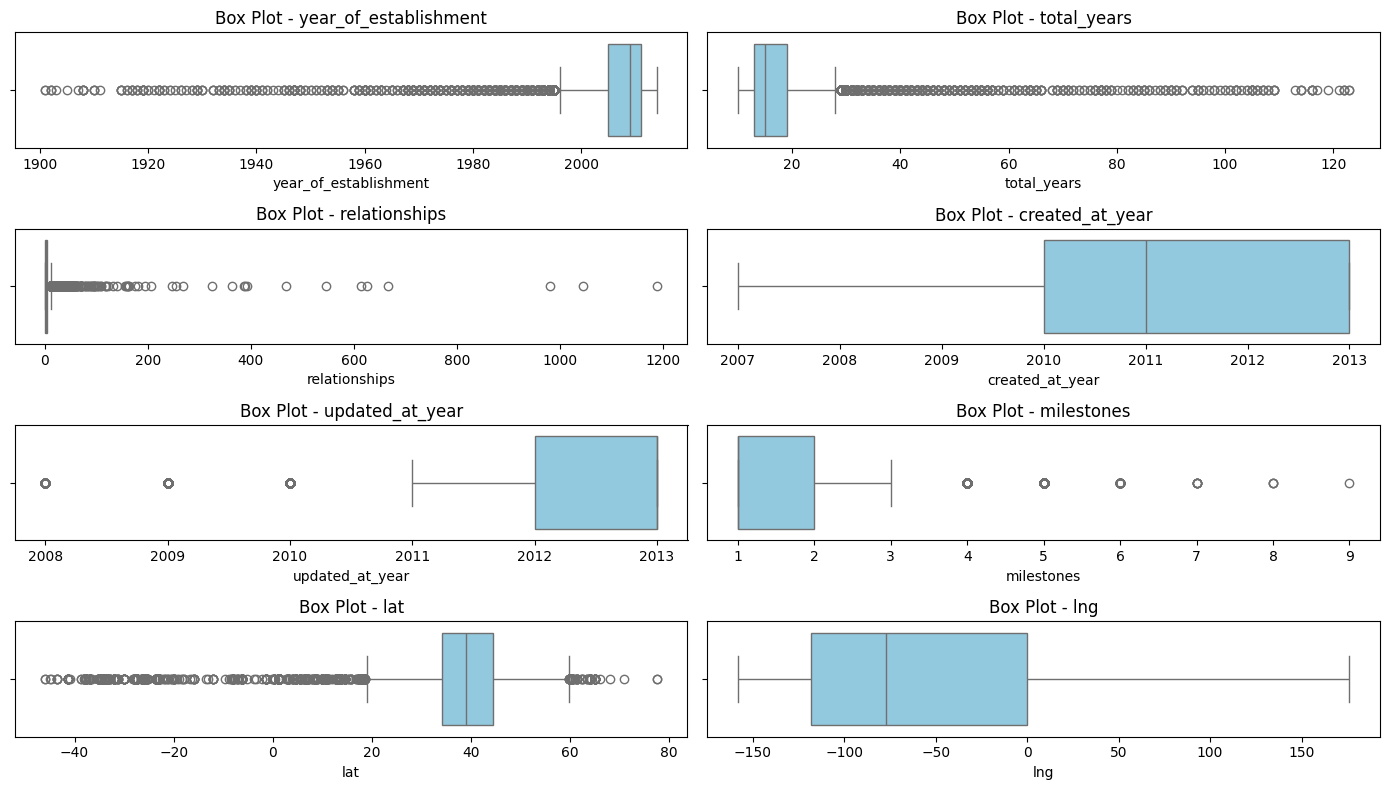

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Loop through each column and create a box plot
for i, column in enumerate(num_col):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

**from the above boxplot we can see that their are outliers In the column 'year_of_establishment' , 'total_years' , 'relationships' , 'updated_at_year' , 'milestones' , 'lat'**

Upper limit:  2020.0
Lower limit:  1996.0


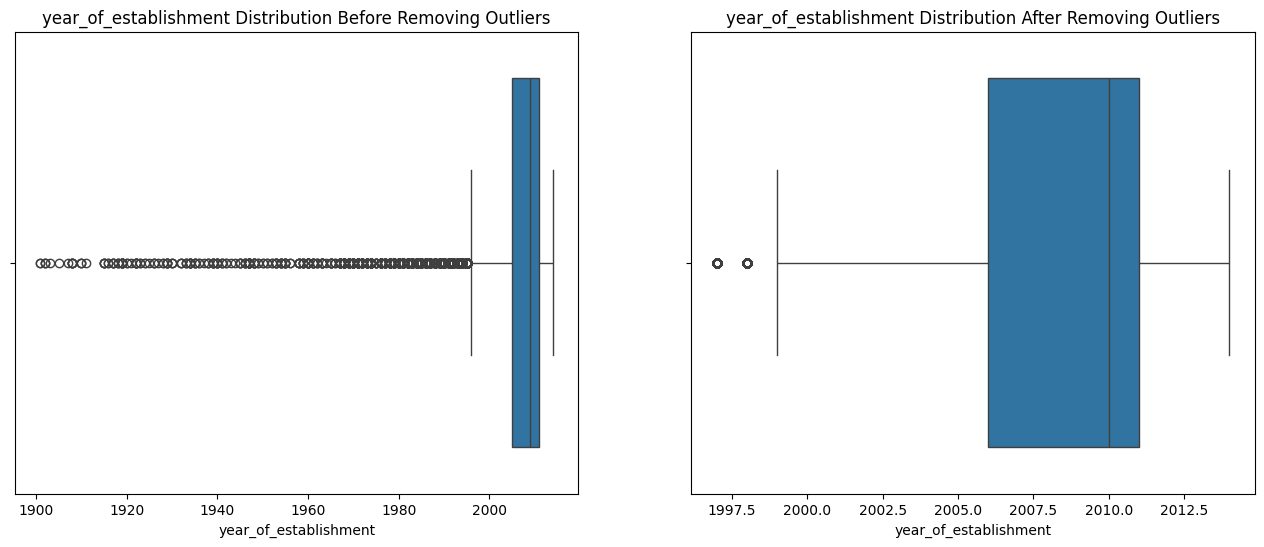

In [176]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    return upper_limit, lower_limit

# Detect outliers for 'Item_Visibility' in combined_df
upper_limit, lower_limit = detect_outliers(df, "year_of_establishment")
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# Visualize the boxplot before removing outliers
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x=df['year_of_establishment'], ax=ax[0])
ax[0].set_title('year_of_establishment Distribution Before Removing Outliers')

# Remove outliers using the above function
df = df[(df['year_of_establishment'] > lower_limit) & (df['year_of_establishment'] < upper_limit)]

# Visualize the boxplot after removing outliers
sns.boxplot(x=df['year_of_establishment'], ax=ax[1])
ax[1].set_title('year_of_establishment Distribution After Removing Outliers')

# Show the plots
plt.show()

Upper limit:  25.5
Lower limit:  5.5


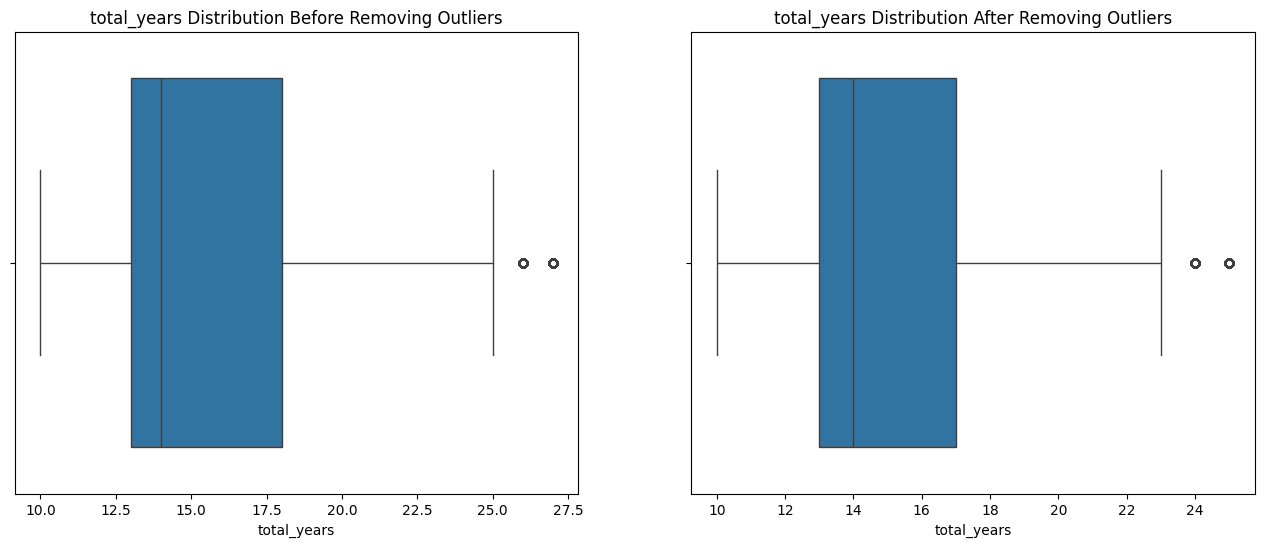

In [177]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    return upper_limit, lower_limit

# Detect outliers for 'Item_Visibility' in combined_df
upper_limit, lower_limit = detect_outliers(df, "total_years")
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# Visualize the boxplot before removing outliers
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x=df['total_years'], ax=ax[0])
ax[0].set_title('total_years Distribution Before Removing Outliers')

# Remove outliers using the above function
df = df[(df['total_years'] > lower_limit) & (df['total_years'] < upper_limit)]

# Visualize the boxplot after removing outliers
sns.boxplot(x=df['total_years'], ax=ax[1])
ax[1].set_title('total_years Distribution After Removing Outliers')

# Show the plots
plt.show()

Upper limit:  11.0
Lower limit:  -5.0


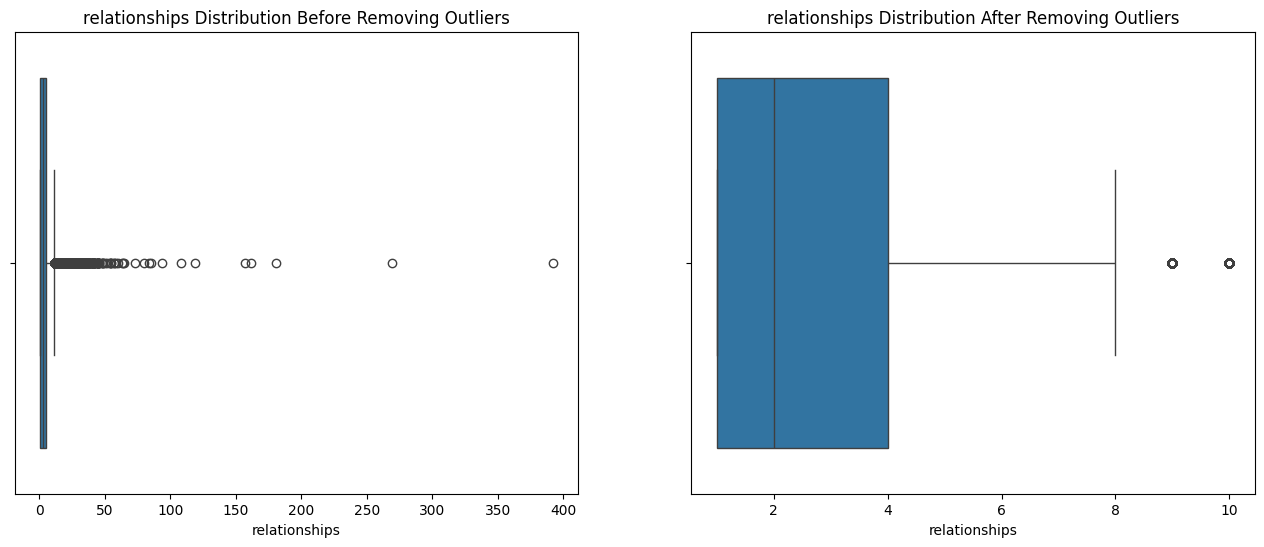

In [178]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    return upper_limit, lower_limit

# Detect outliers for 'Item_Visibility' in combined_df
upper_limit, lower_limit = detect_outliers(df, "relationships")
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# Visualize the boxplot before removing outliers
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x=df['relationships'], ax=ax[0])
ax[0].set_title('relationships Distribution Before Removing Outliers')

# Remove outliers using the above function
df = df[(df['relationships'] > lower_limit) & (df['relationships'] < upper_limit)]

# Visualize the boxplot after removing outliers
sns.boxplot(x=df['relationships'], ax=ax[1])
ax[1].set_title('relationships Distribution After Removing Outliers')

# Show the plots
plt.show()

Upper limit:  2014.5
Lower limit:  2010.5


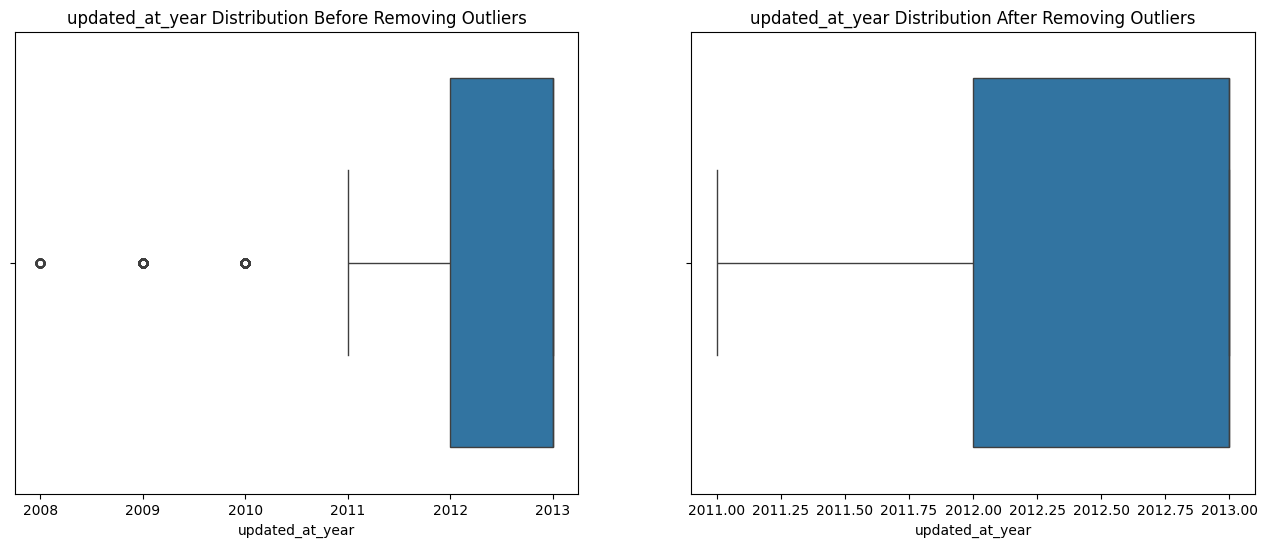

In [179]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    return upper_limit, lower_limit

# Detect outliers for 'Item_Visibility' in combined_df
upper_limit, lower_limit = detect_outliers(df, "updated_at_year")
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# Visualize the boxplot before removing outliers
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x=df['updated_at_year'], ax=ax[0])
ax[0].set_title('updated_at_year Distribution Before Removing Outliers')

# Remove outliers using the above function
df = df[(df['updated_at_year'] > lower_limit) & (df['updated_at_year'] < upper_limit)]

# Visualize the boxplot after removing outliers
sns.boxplot(x=df['updated_at_year'], ax=ax[1])
ax[1].set_title('updated_at_year Distribution After Removing Outliers')

# Show the plots
plt.show()

Upper limit:  3.5
Lower limit:  -0.5


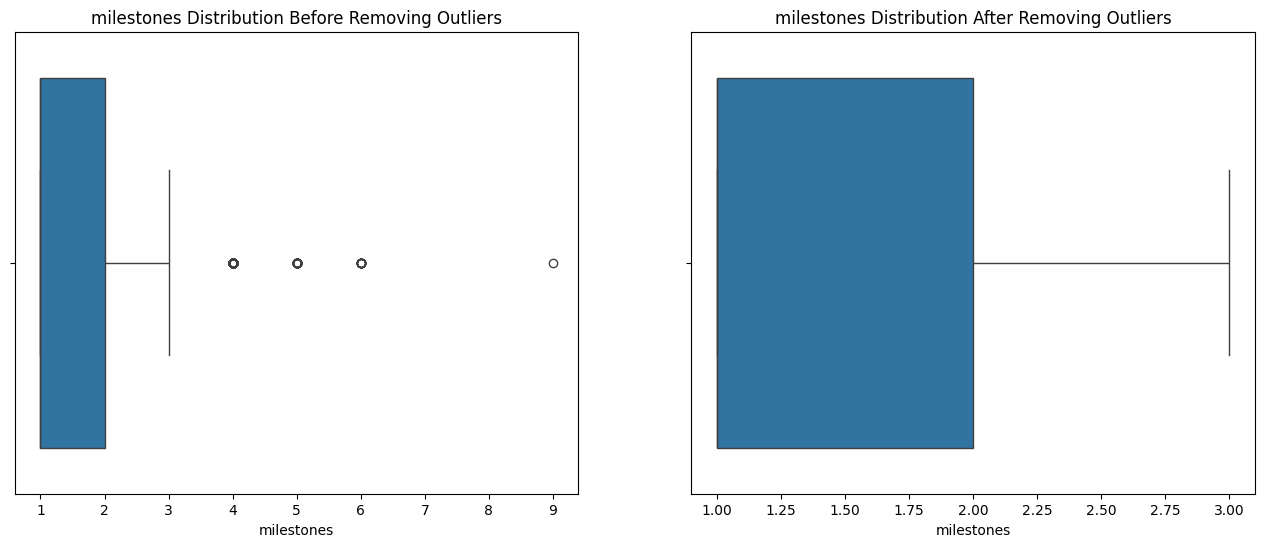

In [180]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    return upper_limit, lower_limit

# Detect outliers for 'Item_Visibility' in combined_df
upper_limit, lower_limit = detect_outliers(df, "milestones")
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# Visualize the boxplot before removing outliers
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x=df['milestones'], ax=ax[0])
ax[0].set_title('milestones Distribution Before Removing Outliers')

# Remove outliers using the above function
df = df[(df['milestones'] > lower_limit) & (df['milestones'] < upper_limit)]

# Visualize the boxplot after removing outliers
sns.boxplot(x=df['milestones'], ax=ax[1])
ax[1].set_title('milestones Distribution After Removing Outliers')

# Show the plots
plt.show()

Upper limit:  62.67587094999999
Lower limit:  16.878052150000006


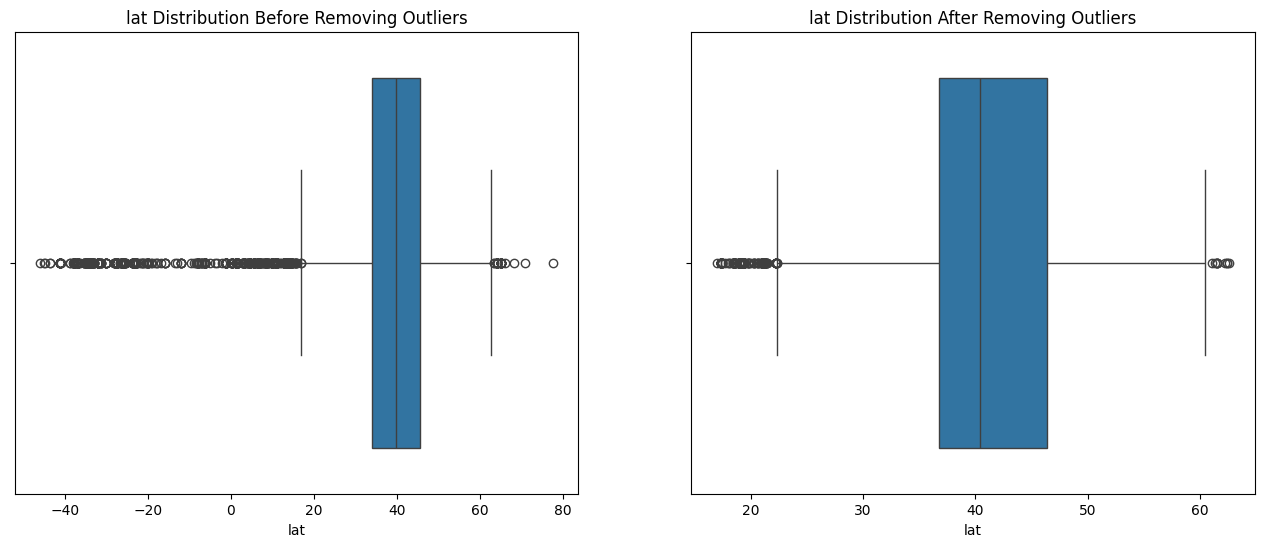

In [181]:
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    return upper_limit, lower_limit

# Detect outliers for 'Item_Visibility' in combined_df
upper_limit, lower_limit = detect_outliers(df, "lat")
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

# Visualize the boxplot before removing outliers
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.boxplot(x=df['lat'], ax=ax[0])
ax[0].set_title('lat Distribution Before Removing Outliers')

# Remove outliers using the above function
df = df[(df['lat'] > lower_limit) & (df['lat'] < upper_limit)]

# Visualize the boxplot after removing outliers
sns.boxplot(x=df['lat'], ax=ax[1])
ax[1].set_title('lat Distribution After Removing Outliers')

# Show the plots
plt.show()

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15786 entries, 20 to 196524
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   entity_id              15786 non-null  int64  
 1   normalized_name        15786 non-null  object 
 2   category_code          15786 non-null  object 
 3   status                 15786 non-null  object 
 4   country_code           15786 non-null  object 
 5   milestones             15786 non-null  float64
 6   relationships          15786 non-null  float64
 7   created_by             15786 non-null  object 
 8   lat                    15786 non-null  float64
 9   lng                    15786 non-null  float64
 10  year_of_establishment  15786 non-null  int64  
 11  total_years            15786 non-null  int64  
 12  created_at_year        15786 non-null  int64  
 13  updated_at_year        15786 non-null  int64  
 14  first_milestone_year   15786 non-null  int64  
 15  

In [183]:
df.shape

(15786, 16)

### Skewness :
 *  If skewness is less than -1 or greater than 1, the distribution is highly skewed.
 *  If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
 *  If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

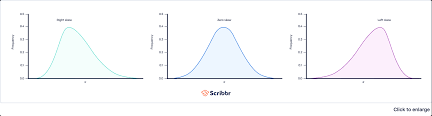

In [184]:
num_col

['year_of_establishment',
 'total_years',
 'relationships',
 'created_at_year',
 'updated_at_year',
 'milestones',
 'lat',
 'lng']

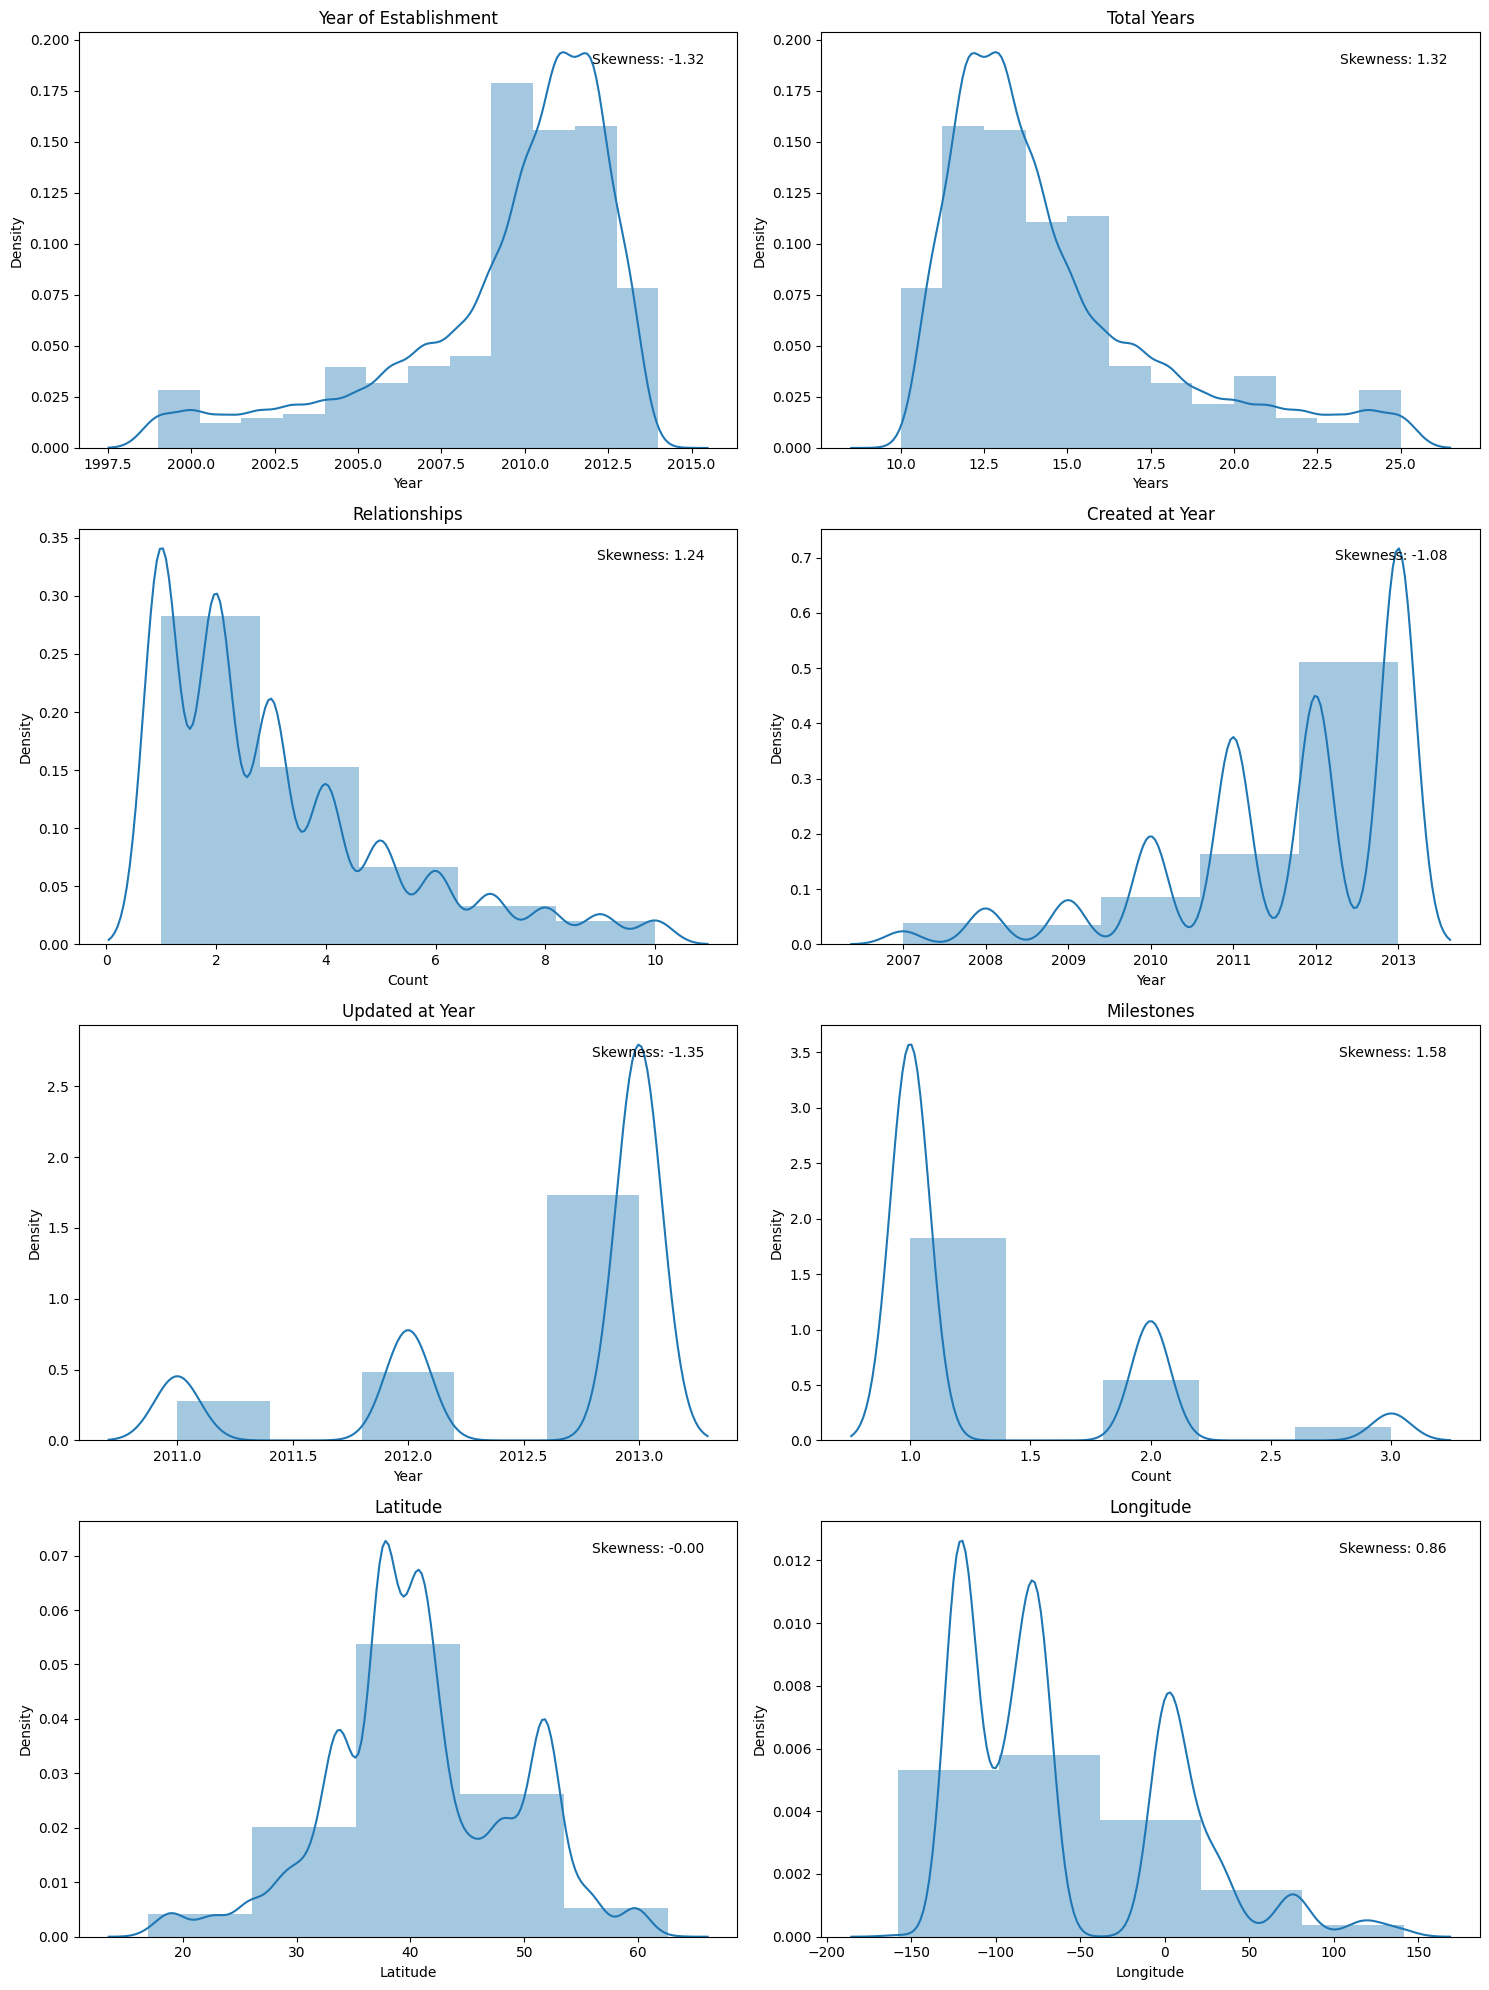

In [185]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.distplot(df['year_of_establishment'], bins=12)
plt.text(0.95, 0.95, f"Skewness: {df['year_of_establishment'].skew():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
plt.title('Year of Establishment')
plt.xlabel('Year')
plt.ylabel('Density')

plt.subplot(4, 2, 2)
sns.distplot(df['total_years'], bins=12)
plt.text(0.95, 0.95, f"Skewness: {df['total_years'].skew():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
plt.title('Total Years')
plt.xlabel('Years')
plt.ylabel('Density')

plt.subplot(4, 2, 3)
sns.distplot(df['relationships'], bins=5)
plt.text(0.95, 0.95, f"Skewness: {df['relationships'].skew():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
plt.title('Relationships')
plt.xlabel('Count')
plt.ylabel('Density')

plt.subplot(4, 2, 4)
sns.distplot(df['created_at_year'], bins=5)
plt.text(0.95, 0.95, f"Skewness: {df['created_at_year'].skew():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
plt.title('Created at Year')
plt.xlabel('Year')
plt.ylabel('Density')

plt.subplot(4, 2, 5)
sns.distplot(df['updated_at_year'], bins=5)
plt.text(0.95, 0.95, f"Skewness: {df['updated_at_year'].skew():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
plt.title('Updated at Year')
plt.xlabel('Year')
plt.ylabel('Density')

plt.subplot(4, 2, 6)
sns.distplot(df['milestones'], bins=5)
plt.text(0.95, 0.95, f"Skewness: {df['milestones'].skew():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
plt.title('Milestones')
plt.xlabel('Count')
plt.ylabel('Density')

plt.subplot(4, 2, 7)
sns.distplot(df['lat'], bins=5)
plt.text(0.95, 0.95, f"Skewness: {df['lat'].skew():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
plt.title('Latitude')
plt.xlabel('Latitude')
plt.ylabel('Density')

plt.subplot(4, 2, 8)
sns.distplot(df['lng'], bins=5)
plt.text(0.95, 0.95, f"Skewness: {df['lng'].skew():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
plt.title('Longitude')
plt.xlabel('Longitude')
plt.ylabel('Density')

plt.tight_layout()

plt.show()



*   'year_of_establishment' , 'total_years' , 'relationships' , 'created_at_year' , 'updated_at_year' , 'milestones' these columns are highly skewed
*  'lat' column is symmetric
*  'lng' column is moderatly skewed



# **Data visualisation**

In [186]:
df.columns


Index(['entity_id', 'normalized_name', 'category_code', 'status',
       'country_code', 'milestones', 'relationships', 'created_by', 'lat',
       'lng', 'year_of_establishment', 'total_years', 'created_at_year',
       'updated_at_year', 'first_milestone_year', 'last_milestone_year'],
      dtype='object')

#### univariate analysis

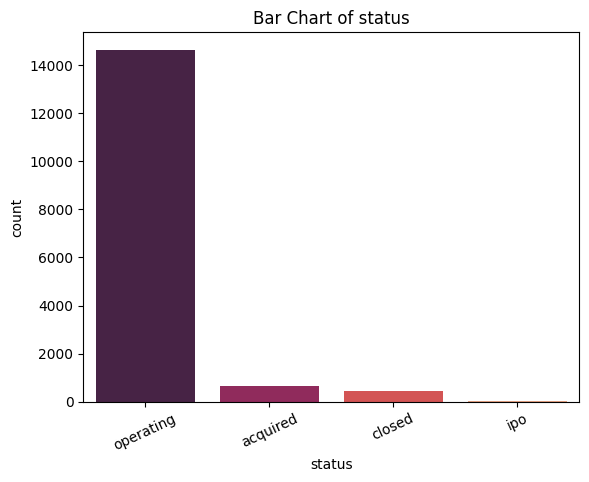

In [187]:
sns.countplot(x=df["status"] ,palette='rocket')
plt.title('Bar Chart of status')
plt.xticks(rotation=25)
plt.show()

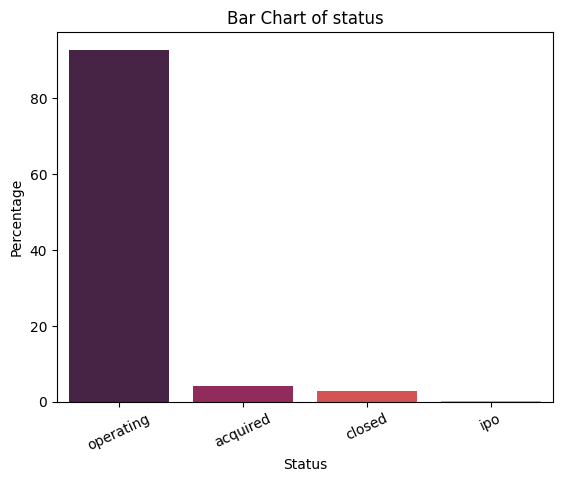

In [188]:

# Assuming df is your DataFrame
status_counts = df["status"].value_counts(normalize=True) * 100
sns.barplot(x=status_counts.index, y=status_counts.values, palette='rocket')
plt.title('Bar Chart of status')
plt.ylabel('Percentage')
plt.xlabel('Status')
plt.xticks(rotation=25)
plt.show()

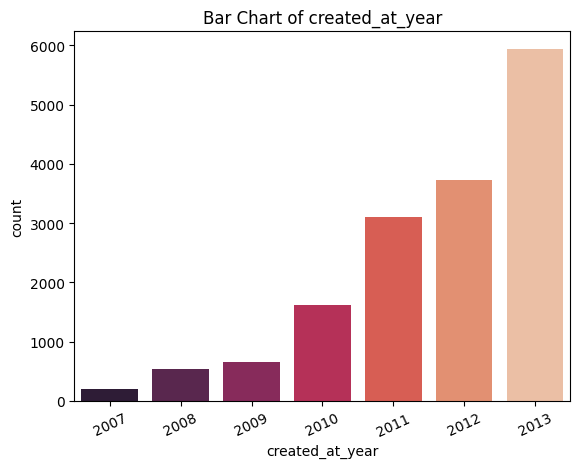

In [189]:
sns.countplot(x=df["created_at_year"] ,palette='rocket')
plt.title('Bar Chart of created_at_year')
plt.xticks(rotation=25)
plt.show()

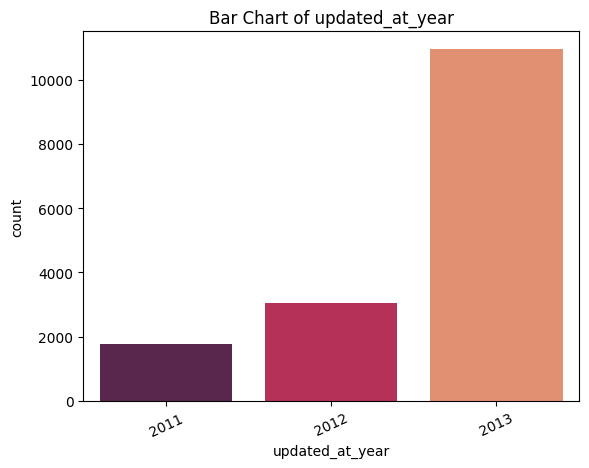

In [190]:
sns.countplot(x=df["updated_at_year"],palette='rocket' )
plt.title('Bar Chart of updated_at_year')
plt.xticks(rotation=25)
plt.show()

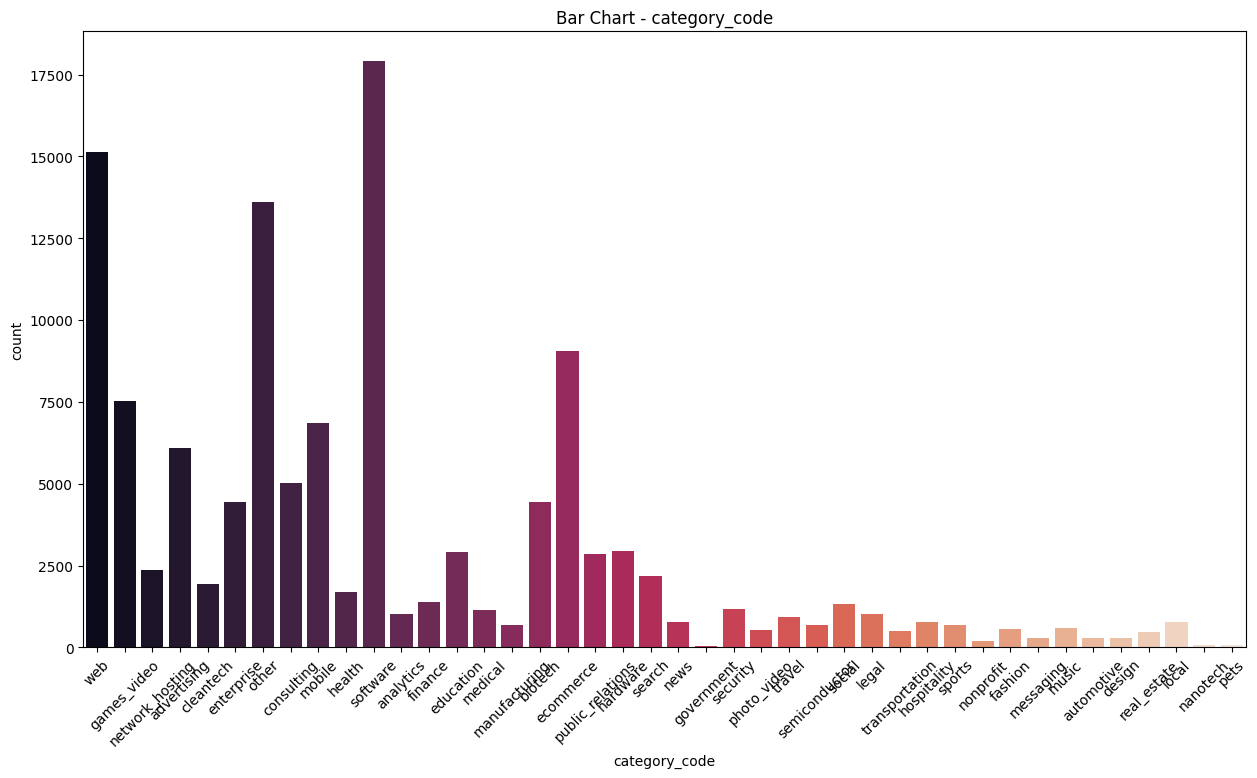

In [191]:
plt.figure(figsize=(15,8))
sns.countplot(x='category_code', data=data,palette='rocket')
plt.title('Bar Chart - category_code')
plt.xticks(rotation=45)
plt.show()


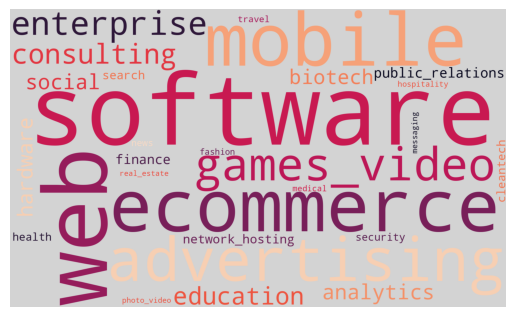

In [192]:
from wordcloud import WordCloud
wc = WordCloud(width=2000, height=1200, background_color="lightgrey" ,min_font_size=30 ,colormap='rocket')
wc.generate(" ".join(df["category_code"]))
plt.imshow(wc)
plt.axis("off")
plt.show()

  Category '**Software**' has the large number of count in data which means most companies come from the Software sector

In [193]:
df['created_by'].unique()

array(['arun', 'initial-importer', 'amantel', ..., 'fastlaneventures',
       '1dollarscan', 'hypercube'], dtype=object)

In [194]:
top_10_created_by = df['created_by'].value_counts().head(10)
print(top_10_created_by)

arun                508
timircha            486
initial-importer    341
daniel              173
bibilyana           143
gene                139
sophia              125
stevenjrossi         94
santosh2013          77
cameronc             75
Name: created_by, dtype: int64


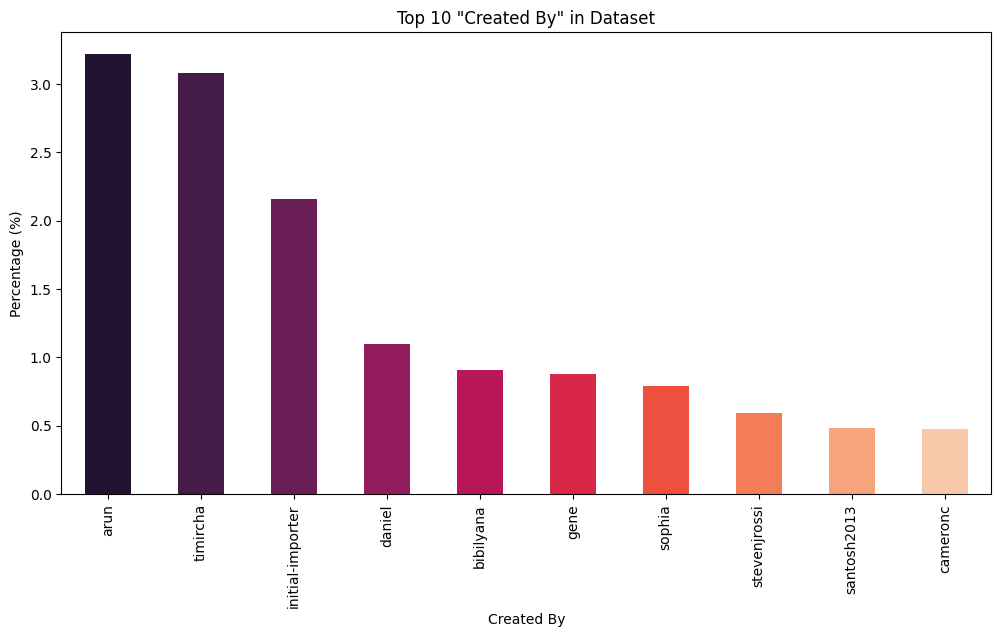

In [195]:
created_by_counts = df['created_by'].value_counts(normalize=True) * 100
top_10_created_by = created_by_counts.head(10)

colors = sns.color_palette('rocket', len(top_10_created_by))

# Plotting
plt.figure(figsize=(12, 6))
top_10_created_by.plot(kind='bar', color=colors)
plt.xlabel('Created By')
plt.ylabel('Percentage (%)')
plt.title('Top 10 "Created By" in Dataset')
plt.show()

<Axes: >

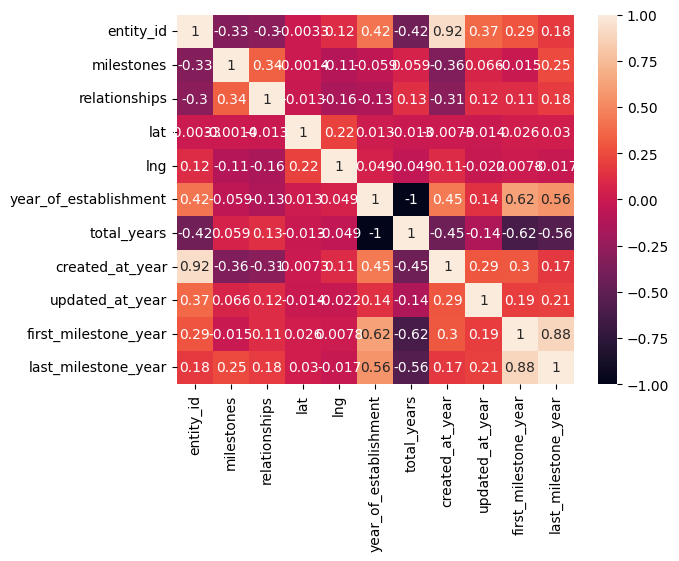

In [196]:
# Plot pairplot
corr = df.corr()
sns.heatmap(corr, annot=True)

#### bivariate *analaysis*

In [197]:
df.columns

Index(['entity_id', 'normalized_name', 'category_code', 'status',
       'country_code', 'milestones', 'relationships', 'created_by', 'lat',
       'lng', 'year_of_establishment', 'total_years', 'created_at_year',
       'updated_at_year', 'first_milestone_year', 'last_milestone_year'],
      dtype='object')

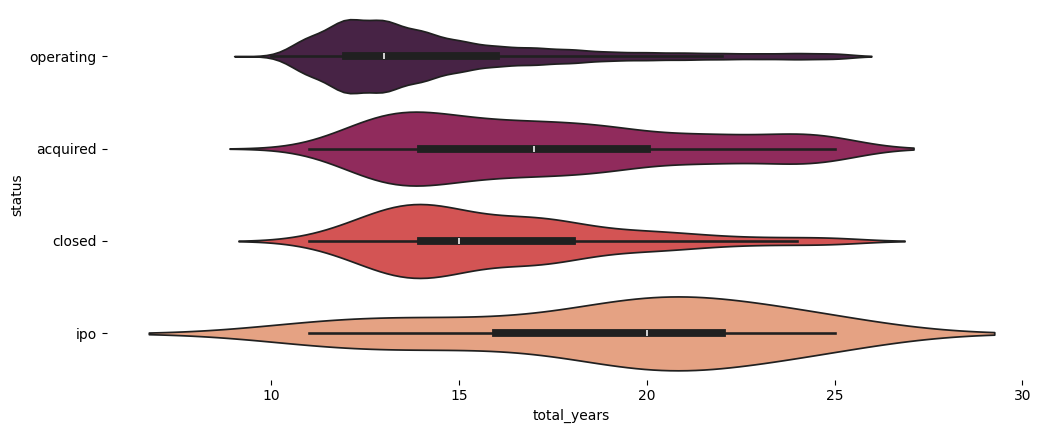

In [198]:
figsize = (12, 1.2 * len(df['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='total_years', y='status', inner='box', palette='rocket')
sns.despine(top=True, right=True, bottom=True, left=True)

* It seems the **operating** status company are new.
* IPO - Initial public offering

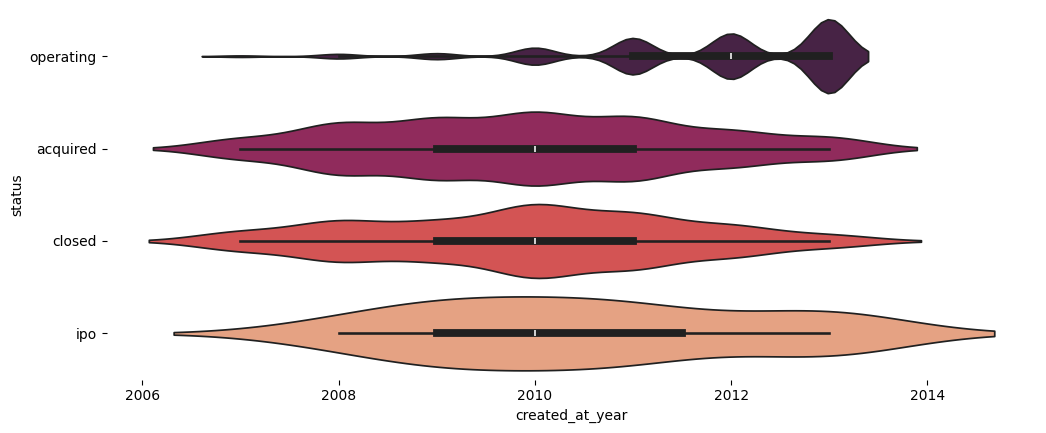

In [199]:
figsize = (12, 1.2 * len(df['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='created_at_year', y='status', inner='box', palette='rocket')
sns.despine(top=True, right=True, bottom=True, left=True)

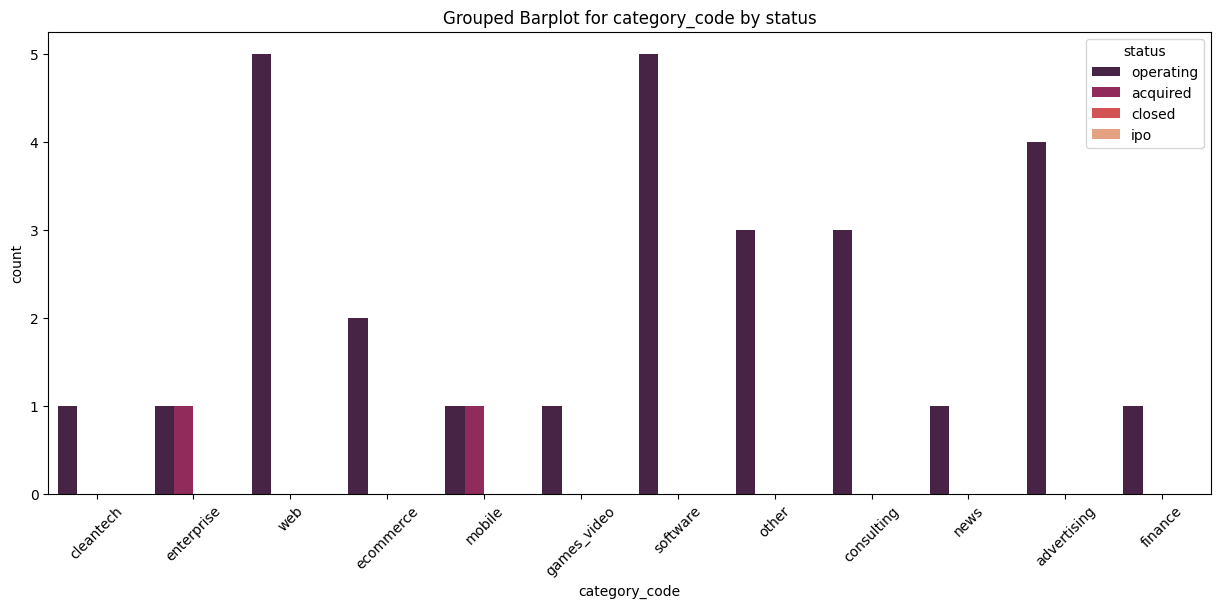

In [201]:
# Grouped Barplot
plt.figure(figsize=(15, 6))
sns.countplot(x=df['category_code'].head(30), hue=df['status'], palette='rocket')
plt.title('Grouped Barplot for category_code by status')
plt.xticks(rotation=45)
plt.show()

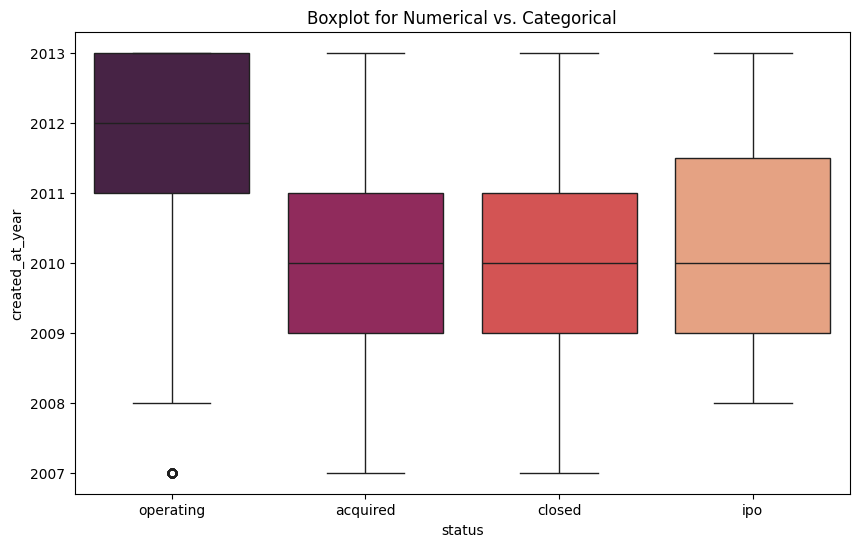

In [200]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='created_at_year', data=df ,palette='rocket')
plt.title('Boxplot for Numerical vs. Categorical')
plt.show()

In [202]:
df.shape

(15786, 16)

In [203]:
df.columns

Index(['entity_id', 'normalized_name', 'category_code', 'status',
       'country_code', 'milestones', 'relationships', 'created_by', 'lat',
       'lng', 'year_of_establishment', 'total_years', 'created_at_year',
       'updated_at_year', 'first_milestone_year', 'last_milestone_year'],
      dtype='object')

In [204]:
# Save the combined data frame to a CSV file
data.to_csv('clean_data.csv', index=False)

import os
print(f"File 'clean_data.csv' created: {os.path.isfile('clean_data.csv')}")

File 'clean_data.csv' created: True
